# Breast Cancer Prediction

## Dataset Source

Miguel Patrício(miguelpatricio '@' gmail.com), José Pereira (jafcpereira '@' gmail.com), Joana Crisóstomo (joanacrisostomo '@' hotmail.com), Paulo Matafome (paulomatafome '@' gmail.com), Raquel Seiça (rmfseica '@' gmail.com), Francisco Caramelo (fcaramelo '@' fmed.uc.pt), all from the Faculty of Medicine of the University of Coimbra and also Manuel Gomes (manuelmgomes '@' gmail.com) from the University Hospital Centre of Coimbra.

## Data Set Information:

There are 10 predictors, all quantitative, and a binary dependent variable, indicating the presence or absence of breast cancer.
The predictors are anthropometric data and parameters which can be gathered in routine blood analysis.
Prediction models based on these predictors, if accurate, can potentially be used as a biomarker of breast cancer.

## Attribute Information:

Quantitative Attributes:
- Age (years)
- BMI (kg/m2)
- Glucose (mg/dL)
- Insulin (µU/mL)
- HOMA
- Leptin (ng/mL)
- Adiponectin (µg/mL)
- Resistin (ng/mL)
- MCP-1(pg/dL)

Labels:
- 1=Healthy controls
- 2=Patients

Abbreviations
- BC: Breast cancer; 
- BMI: Body mass index; 
- HOMA: Homeostasis Model Assessment; 
- MCP-1: Chemokine Monocyte Chemoattractant Protein 1;

## Goals
The goal of this exploratory study was to develop and assess a prediction model which can potentially
be used as a biomarker of breast cancer, based on anthropometric data and parameters which can be gathered in
routine blood analysis.

Nowadays in a medical test, the big indicators of success are specificity and sensitivity. Every medical test strives to reach 100% in both criteria.

Sensitivity/recall:
- How good a test is at detecting the positives. A test can cheat and maximize this by always returning “positive”.

Specificity:
- How good a test is at avoiding false alarms. A test can cheat and maximize this by always returning “negative”.

# Data Exploration

## Load libraries and read the data

In [1]:
#importing the libraries\
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import itertools
from itertools import chain
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve, train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score
import warnings
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

warnings.filterwarnings('ignore') #ignore warning messages 

In [2]:
#importing the dataset 
df = pd.read_csv("dataR2.csv")

## Description

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


## Data Column Identification

In [4]:
df.columns

Index(['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin',
       'Resistin', 'MCP.1', 'Classification'],
      dtype='object')

## Data numeric

In [5]:
numeric=['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_num=df.select_dtypes(include=numeric)
df_num.head(3)

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1


In [6]:
df.Classification.unique()

array([1, 2])

# Exploratory Data Analysis (EDA)

## Changing 'status' data value

In [7]:
df['Classification'] = df.Classification.map({1:0, 2:1})
df

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,0
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,0
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,0
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,0
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,0
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,1
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,1
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,1
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,1


## Statistical Summary

In [8]:
describeNum = df.describe(include =['float64', 'int64', 'float', 'int'])
describeNum.T.style.background_gradient(cmap='viridis',low=0.2,high=0.1)

,count,mean,std,min,25%,50%,75%,max
Age,116.000000,57.301724,16.112766,24.000000,45.000000,56.000000,71.000000,89.000000
BMI,116.000000,27.582111,5.020136,18.370000,22.973205,27.662416,31.241442,38.578759
Glucose,116.000000,97.793103,22.525162,60.000000,85.750000,92.000000,102.000000,201.000000
Insulin,116.000000,10.012086,10.067768,2.432000,4.359250,5.924500,11.189250,58.460000
HOMA,116.000000,2.694988,3.642043,0.467409,0.917966,1.380939,2.857787,25.050342
Leptin,116.000000,26.615080,19.183294,4.311000,12.313675,20.271000,37.378300,90.280000
Adiponectin,116.000000,10.180874,6.843341,1.656020,5.474282,8.352692,11.815970,38.040000
Resistin,116.000000,14.725966,12.390646,3.210000,6.881763,10.827740,17.755207,82.100000
MCP.1,116.000000,534.647000,345.912663,45.843000,269.978250,471.322500,700.085000,1698.440000
Classification,116.000000,0.551724,0.499475,0.000000,0.000000,1.000000,1.000000,1.000000


## Missing Value 

In [9]:
null=pd.DataFrame(df.isnull().sum(),columns=["Null Values"])
null["% Missing Values"]=(df.isna().sum()/len(df)*100)
null = null[null["% Missing Values"] > 0]
null.style.background_gradient(cmap='viridis',low =0.2,high=0.1) 

,Null Values,% Missing Values


## Graphic Approach

 ### Correlation heatmap

In [10]:
df.corr()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
Age,1.000000,0.008530,0.230106,0.032495,0.127033,0.102626,-0.219813,0.002742,0.013462,-0.043555
BMI,0.008530,1.000000,0.138845,0.145295,0.114480,0.569593,-0.302735,0.195350,0.224038,-0.132586
Glucose,0.230106,0.138845,1.000000,0.504653,0.696212,0.305080,-0.122121,0.291327,0.264879,0.384315
Insulin,0.032495,0.145295,0.504653,1.000000,0.932198,0.301462,-0.031296,0.146731,0.174356,0.276804
HOMA,0.127033,0.114480,0.696212,0.932198,1.000000,0.327210,-0.056337,0.231101,0.259529,0.284012
Leptin,0.102626,0.569593,0.305080,0.301462,0.327210,1.000000,-0.095389,0.256234,0.014009,-0.001078
Adiponectin,-0.219813,-0.302735,-0.122121,-0.031296,-0.056337,-0.095389,1.000000,-0.252363,-0.200694,-0.019490
Resistin,0.002742,0.195350,0.291327,0.146731,0.231101,0.256234,-0.252363,1.000000,0.366474,0.227310
MCP.1,0.013462,0.224038,0.264879,0.174356,0.259529,0.014009,-0.200694,0.366474,1.000000,0.091381
Classification,-0.043555,-0.132586,0.384315,0.276804,0.284012,-0.001078,-0.019490,0.227310,0.091381,1.000000


(10.5, -0.5)

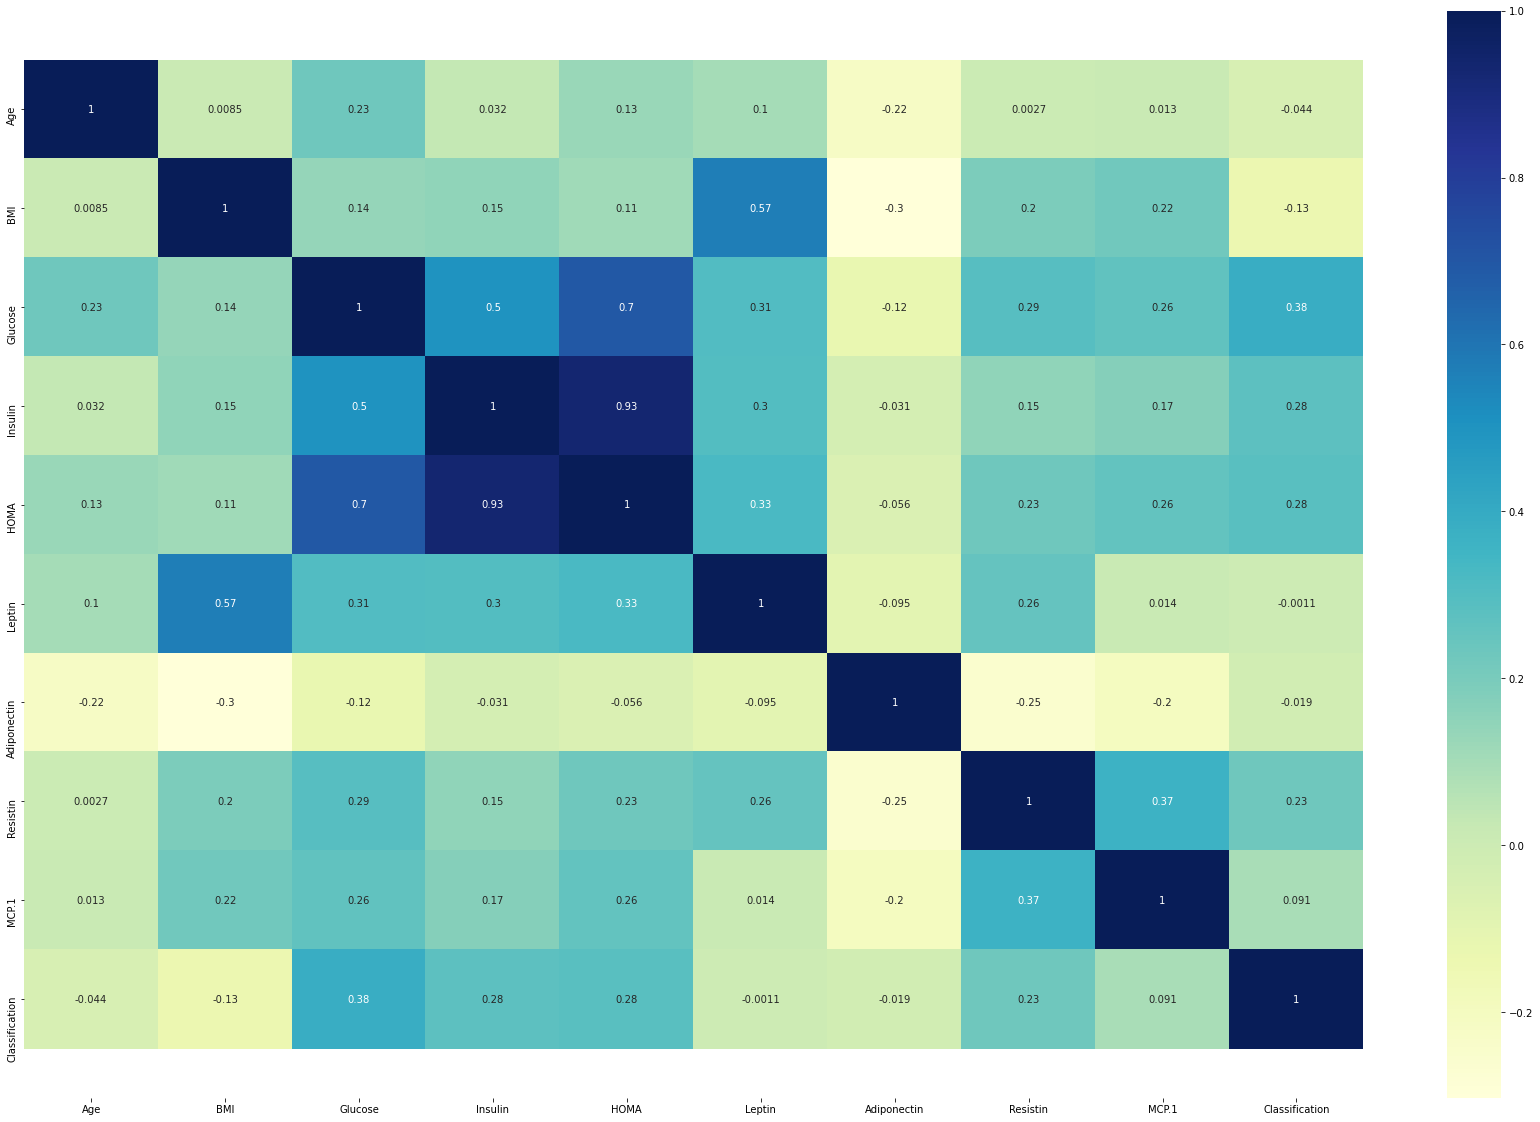

In [11]:
plt.figure(figsize=(30,20))
ax = sns.heatmap(data = df.corr(),cmap='YlGnBu',annot=True)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5,top - 0.5)

### Scatter plot

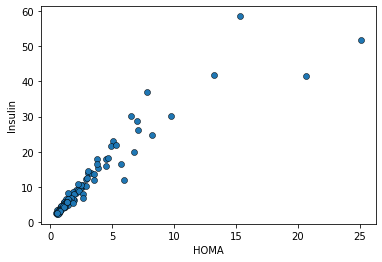

In [12]:
fig, ax = plt.subplots()
_ = plt.scatter(x=df['HOMA'], y=df['Insulin'], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="HOMA", ylabel="Insulin")

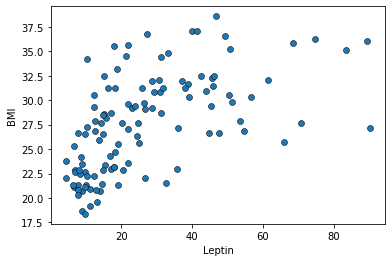

In [13]:
fig, ax = plt.subplots()
_ = plt.scatter(x=df['Leptin'], y=df['BMI'], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="Leptin", ylabel="BMI")

### Box plots

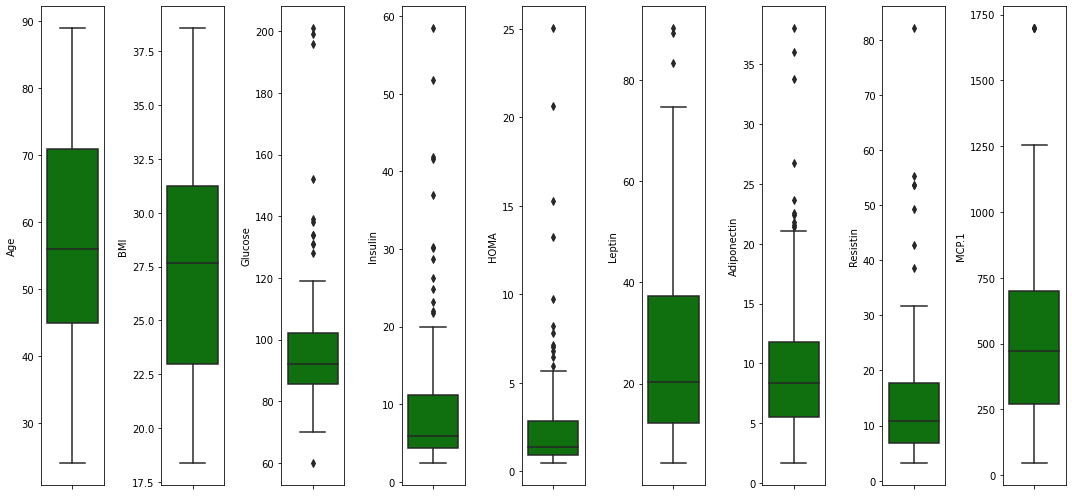

In [14]:
featuresNum = ['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin', 'Resistin', 'MCP.1']
plt.figure(figsize=(15, 7))
for i in range(0, len(featuresNum)):
    plt.subplot(1, len(featuresNum), i+1)
    sns.boxplot(y=df[featuresNum[i]], color='green', orient='v')
    plt.tight_layout()

### How many patients have breast cancer and not?

No handles with labels found to put in legend.


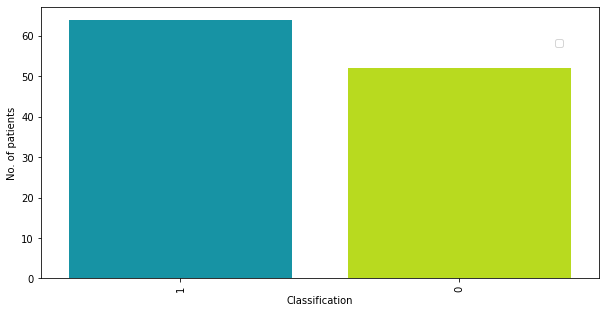

In [15]:
fig, ax = plt.subplots(figsize=(10,5))

_ = sns.countplot(x="Classification", data=df, palette="nipy_spectral",
              order=df.Classification.value_counts().index)

_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="Classification", ylabel="No. of patients")
plt.legend(bbox_to_anchor=(0.945, 0.90))

In [16]:
#How many Startup have both 'acquired' status and is_top500?
len(df[(df["Classification"] == True)].index)

64

In [17]:
#How many Startup have both 'acquired' status and is_top500?
len(df[(df["Classification"] == False)].index)

52

### Which Age related to Patients or Healty Control Health?

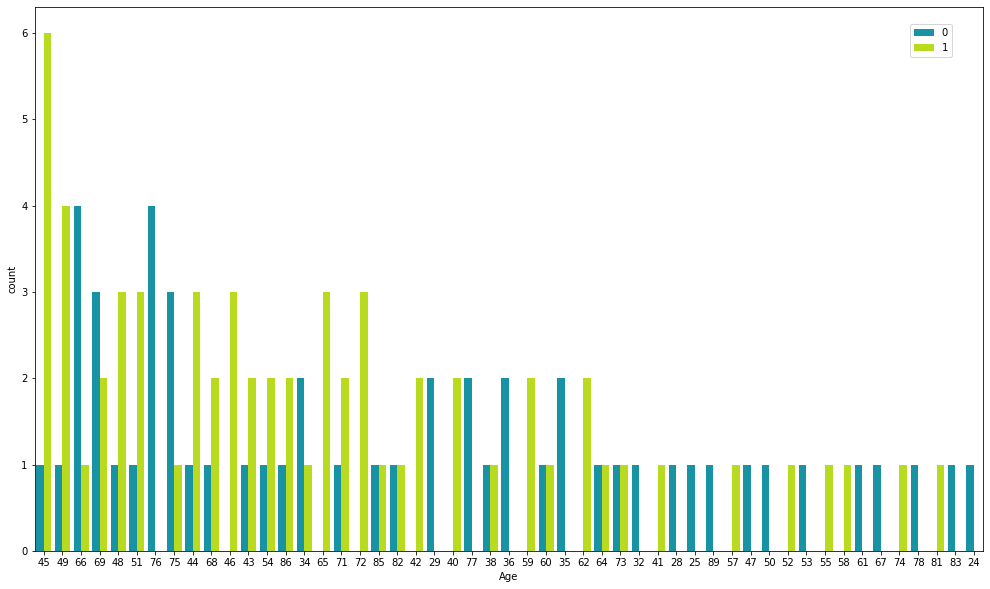

In [18]:
fig, ax = plt.subplots(figsize=(17,10))

sns.countplot(x="Age", hue="Classification", data=df, palette="nipy_spectral",
              order=df.Age.value_counts().index)
plt.legend(bbox_to_anchor=(0.945, 0.90))

# Data Preprocessing

## Duplicate Values

In [19]:
#check
duplicate = df[df.duplicated()] 
  
print("Duplicate Rows :")

Duplicate Rows :


## Negative value

In [20]:
age=['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin', 'Resistin', 'MCP.1']

for a in range(len(age)):
    print("Is there any negative value in '{}' column  : {} ".format(age[a],(df[age[a]]<0).any()))

Is there any negative value in 'Age' column  : False 
Is there any negative value in 'BMI' column  : False 
Is there any negative value in 'Glucose' column  : False 
Is there any negative value in 'Insulin' column  : False 
Is there any negative value in 'HOMA' column  : False 
Is there any negative value in 'Leptin' column  : False 
Is there any negative value in 'Adiponectin' column  : False 
Is there any negative value in 'Resistin' column  : False 
Is there any negative value in 'MCP.1' column  : False 


## Outliers

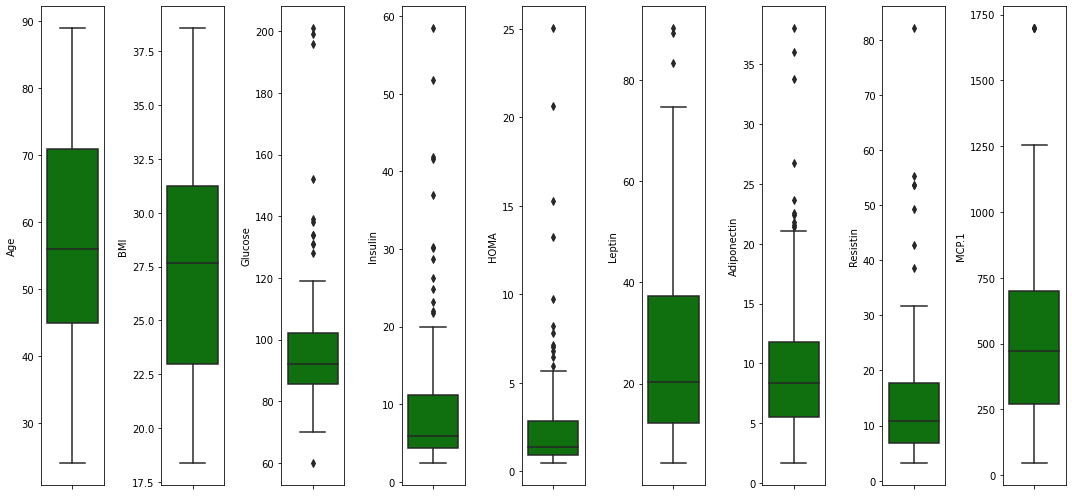

In [21]:
featuresNum = ['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin', 'Resistin', 'MCP.1']
plt.figure(figsize=(15, 7))
for i in range(0, len(featuresNum)):
    plt.subplot(1, len(featuresNum), i+1)
    sns.boxplot(y=df[featuresNum[i]], color='green', orient='v')
    plt.tight_layout()

## Log-transformation variable

In [22]:
df["Glucose"] = np.log(df["Glucose"])
df["Insulin"] = np.log(df["Insulin"])
df["HOMA"] = np.log(df["HOMA"])
df["Leptin"] = np.log(df["Leptin"])
df["Adiponectin"] = np.log(df["Adiponectin"])
df["Resistin"] = np.log(df["Resistin"])
df["MCP.1"] = np.log(df["MCP.1"])

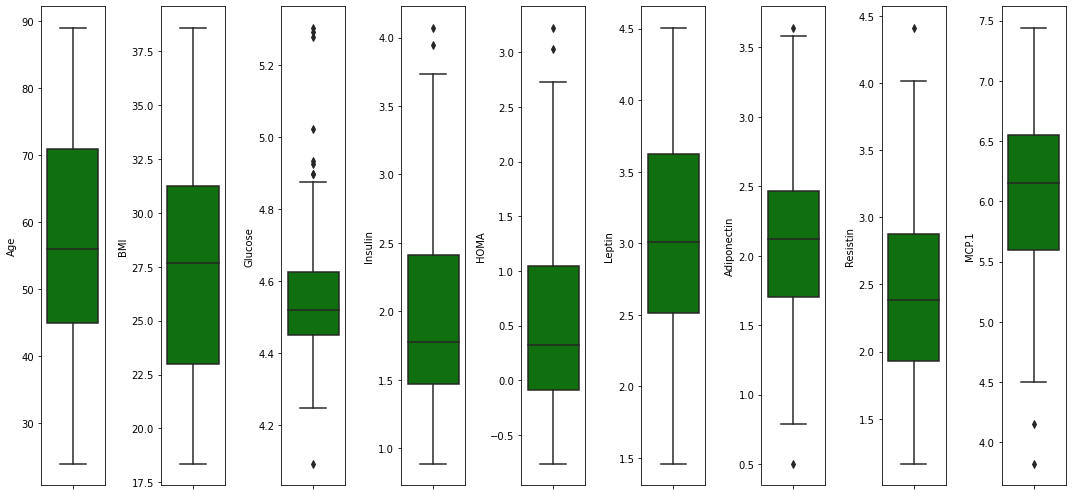

In [23]:
featuresNum = ['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin', 'Resistin', 'MCP.1']
plt.figure(figsize=(15, 7))
for i in range(0, len(featuresNum)):
    plt.subplot(1, len(featuresNum), i+1)
    sns.boxplot(y=df[featuresNum[i]], color='green', orient='v')
    plt.tight_layout()

## Drop unused column for modelling

In [24]:
df = df.drop(['Insulin'],axis=1)
df = df.drop(['MCP.1'],axis=1)
df = df.drop(['Adiponectin'],axis=1)
df = df.drop(['Leptin'],axis=1)
df = df.drop(['HOMA'],axis=1)

# Modeling

In [25]:
from sklearn.model_selection import train_test_split
# Split the data
# Input/independent variables
X = df.drop('Classification', axis = 1) # her we are droping the output feature as this is the target and 'X' is input features, the changes are not 
                                              # made inplace as we have not used 'inplace = True'

y = df['Classification'] # Output/Dependent variable
# train_x, test_x,train_y,test_y = train_test_split(X,y)

In [26]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X =  sc.fit_transform(X)
X

array([[-0.57979363, -0.81667527, -1.62590777, -0.51712256],
       [ 1.60182096, -1.37875056, -0.20956195, -1.49723393],
       [ 1.53948912, -0.89176446, -0.26620198, -0.30186252],
       [ 0.66684328, -1.24330321, -1.13196168,  0.16047266],
       [ 1.7888165 , -1.29460116, -0.20956195, -0.11204255],
       [-0.51746179, -0.94582375, -0.20956195, -0.14791524],
       [ 1.97581204, -0.97672487, -1.13196168,  0.17964274],
       [ 1.16549804, -0.75665667,  1.08034465, -1.16719499],
       [ 0.97850251, -1.11676827,  0.064709  , -0.86593206],
       [ 1.1031662 , -0.91670627, -0.74309097, -0.69099407],
       [-1.45243947, -1.22280113, -1.06508963, -0.72640868],
       [-1.7640987 , -0.91470565, -0.80591006, -1.32413723],
       [-2.01342608, -0.94471495, -0.80591006, -1.15707247],
       [-2.07575793, -1.78297474, -0.43993371, -0.74113349],
       [-1.20311209, -0.84868519, -1.26835143, -0.29053415],
       [-0.82912101, -1.36484515, -0.55907715, -0.58305549],
       [-0.64212548, -1.

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# lets print the shapes again 
print("Shape of the X Train :", X_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the X test :", X_test.shape)
print("Shape of the y test :", y_test.shape)

Shape of the X Train : (92, 4)
Shape of the y Train : (92,)
Shape of the X test : (24, 4)
Shape of the y test : (24,)


In [28]:
# Model Build
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,roc_curve, auc, precision_recall_curve, f1_score
import warnings
warnings.filterwarnings('ignore')

## Random Forest

Training Accuracy : 1.0
Testing Accuracy : 0.9583333333333334


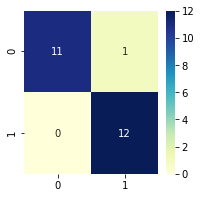

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.92      1.00      0.96        12

    accuracy                           0.96        24
   macro avg       0.96      0.96      0.96        24
weighted avg       0.96      0.96      0.96        24

------------------------------------------
ROC Curves  :  0.9583333333333333
Sensitivity :  0.9166666666666666
Specificity :  1.0


In [29]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(X_train,y_train)


y_pred_rf = rf.predict(X_test)

print("Training Accuracy :", rf.score(X_train, y_train))
print("Testing Accuracy :", rf.score(X_test, y_test))

cm = confusion_matrix(y_test, y_pred_rf)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()

cr = classification_report(y_test, y_pred_rf)
print(cr)


print("------------------------------------------")

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_rf)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC Curves  : ",roc_auc)

sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity1)

specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity1)

## LGBM

Training Accuracy : 0.9347826086956522
Testing Accuracy : 0.875


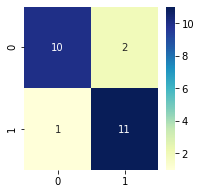

              precision    recall  f1-score   support

           0       0.91      0.83      0.87        12
           1       0.85      0.92      0.88        12

    accuracy                           0.88        24
   macro avg       0.88      0.88      0.87        24
weighted avg       0.88      0.88      0.87        24

------------------------------------------
ROC Curves  :  0.8749999999999999
Sensitivity :  0.8333333333333334
Specificity :  0.9166666666666666


In [30]:
from lightgbm import LGBMClassifier
clf = LGBMClassifier()

clf.fit(X_train,y_train)

y_pred_lgb = clf.predict(X_test)

print("Training Accuracy :", clf.score(X_train, y_train))
print("Testing Accuracy :", clf.score(X_test, y_test))

cm = confusion_matrix(y_test, y_pred_lgb)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()

cr = classification_report(y_test, y_pred_lgb)
print(cr)

print("------------------------------------------")

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_lgb)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC Curves  : ",roc_auc)

sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity1)

specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity1)

## XGBoost

Training Accuracy : 1.0
Testing Accuracy : 0.875


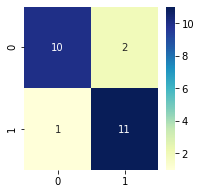

              precision    recall  f1-score   support

           0       0.91      0.83      0.87        12
           1       0.85      0.92      0.88        12

    accuracy                           0.88        24
   macro avg       0.88      0.88      0.87        24
weighted avg       0.88      0.88      0.87        24

------------------------------------------
ROC Curves  :  0.8749999999999999
Sensitivity :  0.8333333333333334
Specificity :  0.9166666666666666


In [31]:
from xgboost import XGBClassifier

#train
xgb = XGBClassifier()

xgb.fit(X_train,y_train)

#predict
y_predicted_xgb = xgb.predict(X_test)

print("Training Accuracy :", xgb.score(X_train, y_train))
print("Testing Accuracy :", xgb.score(X_test, y_test))

#eval
cm = confusion_matrix(y_test, y_predicted_xgb)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()

cr = classification_report(y_test, y_predicted_xgb)
print(cr)

print("------------------------------------------")

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_predicted_xgb)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC Curves  : ",roc_auc)

sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity1)

specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity1)

## SVM

Training Accuracy : 1.0
Testing Accuracy : 0.875


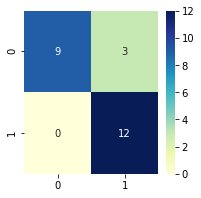

              precision    recall  f1-score   support

           0       1.00      0.75      0.86        12
           1       0.80      1.00      0.89        12

    accuracy                           0.88        24
   macro avg       0.90      0.88      0.87        24
weighted avg       0.90      0.88      0.87        24

------------------------------------------
ROC Curves  :  0.875
Sensitivity :  0.75
Specificity :  1.0


In [32]:
from sklearn.ensemble import GradientBoostingClassifier
#train
gbc = GradientBoostingClassifier(learning_rate=0.02,
                    max_depth=4,
                    random_state=100, n_estimators=1000)


gbc.fit(X_train,y_train)

#predict
y_predicted_gb = gbc.predict(X_test)

print("Training Accuracy :", gbc.score(X_train, y_train))
print("Testing Accuracy :", gbc.score(X_test, y_test))

#eval
cm = confusion_matrix(y_test, y_predicted_gb)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()

cr = classification_report(y_test, y_predicted_gb)
print(cr)


print("------------------------------------------")

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_predicted_gb)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC Curves  : ",roc_auc)

sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity1)

specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity1)